#**Impact of Air Quality on Health**
---
### **Introduction**

This analysis investigates the relationship between air quality, weather conditions, and public health impacts, utilizing a dataset of 5,811 records. By examining pollutant concentrations, AQI levels, and health impact metrics, we aim to identify how air pollution and environmental factors influence public health risk.

---


### **Hypothesis Question:**
Is there a statistically significant association between higher levels of aiq quality index and increased health impact severity in the given population?

---
**Data**
- `air_quality_health_impact_data.csv`

---



**Libraries to use**


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

**Obtain and read in the dataset**

In [5]:
df = pd.read_csv("data/air_quality_health_impact_data.csv")

In [6]:
# Read through the first five rows
df.head(10)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
5,6,77.997260,36.113445,97.113240,87.769562,32.261206,136.999714,-1.441781,32.635904,4.675127,13,5,2,70.361491,1.0
6,7,29.041806,174.230575,68.578418,186.815370,96.766420,44.982397,34.378592,24.679305,6.610047,10,2,2,65.819949,1.0
7,8,433.088073,278.629026,83.673782,106.947943,9.707749,131.566014,33.707434,40.373157,17.376644,11,8,1,100.000000,0.0
8,9,300.557506,149.023028,185.789347,138.745212,90.267117,59.409878,33.123146,36.035212,14.464875,8,6,4,100.000000,0.0
9,10,354.036289,252.883645,182.150363,179.297055,44.521212,117.957437,9.537247,64.099202,14.253878,13,5,1,100.000000,0.0


In [7]:
# How big is the dataset
df.shape

(5811, 15)

In [8]:
# Dataset structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [9]:
df_duplicates = df.duplicated().sum()
df_duplicates

0

*Observation:*
- The dataset comprises 5,811 rows and 15 columns, with most columns containing float-type values. There are no missing values, as all columns have a consistent non-null count of 5,811. Additionally, there are no duplicate records. Overall, the dataset is clean and well-structured for analysis

#### **Explorative Analysis**

**1.Distribution of AQI Categories**

In [12]:
# Statistical Summary of AQI
aqi_summary = df["AQI"].describe()
aqi_summary

count    5811.000000
mean      248.438476
std       144.777638
min         0.005817
25%       122.951293
50%       249.127841
75%       373.630668
max       499.858837
Name: AQI, dtype: float64

*Observation:*
- Descriptively, the AQI has **5,811** values, with an average Air Quality Index of **248.44** and a standard deviation of **144.78**. The least recorded AQI was **0.0058** and Highest recordeD value being **499.86**

In [14]:
# Categories AQI
def epi_aqi_categories(value):
  if 0 < value <= 50:
    return  "Good"
  elif 50 < value <= 100:
    return "Moderate"
  elif 100 < value <= 150:
    return "Unhealthy for Sensitive Groups"
  elif 150 < value <= 200:
    return "Unhealthy"
  elif 200 < value <= 300:
    return "Very Unhealthy"
  else:
    return "Hazardous"

# Category Column
df["AQI_Category"] = df["AQI"].apply(epi_aqi_categories)

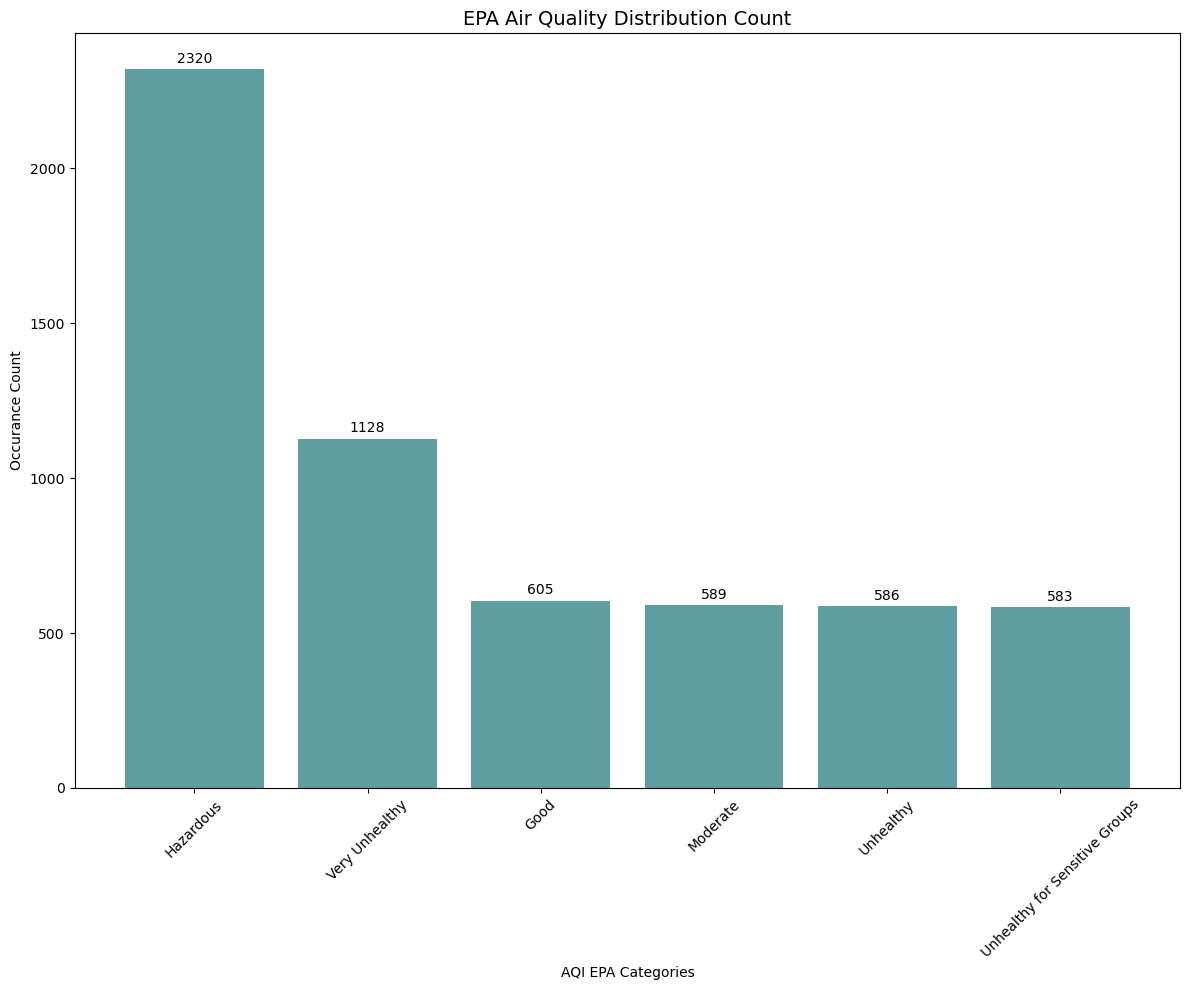

In [15]:
# Visualize AQI Category count
category_count = df["AQI_Category"].value_counts()

#Bar Plot
plt.figure(figsize=(12,10))
plt.bar(category_count.index,category_count.values, color = "cadetblue")

for index, value in enumerate(category_count.values):
  plt.text(index,value + 10, str(value), ha = 'center', va ='bottom', fontsize=10)
plt.title("EPA Air Quality Distribution Count", fontsize = 14)
plt.xlabel("AQI EPA Categories")
plt.ylabel("Occurance Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Observation:*
- Nearly Upto 60% of AQI records fall into `Very Unhealthy` and `Hazardous` categories, indicating increased potential health effect

**2.AQI Pollutant Constitutes**

In [18]:
# Pollutants to Examine
pollutants = ["PM10","PM2_5","NO2", "SO2","O3"]

# total pollutant concentration across a row
df["Total_Conc"] = df[pollutants].sum(axis=1)

#Percentage pollutant contribution to total
for pollutant in pollutants:
  df[f"{pollutant}_Pct"] = (df[pollutant]/df["Total_Conc"])*100

# Pollutants Pct Concentration within AQI Category
pollutants_percent_conc = df.groupby("AQI_Category")[
                          [f"{poll}_Pct" for poll in pollutants]].mean().round(2)

pollutants_percent_conc

,PM10_Pct,PM2_5_Pct,NO2_Pct,SO2_Pct,O3_Pct
AQI_Category,,,,,
Good,25.93,18.83,19.01,9.71,26.52
Hazardous,26.64,18.53,19.06,9.36,26.41
Moderate,26.13,18.81,19.00,9.39,26.68
Unhealthy,27.10,17.90,19.06,9.35,26.59
Unhealthy for Sensitive Groups,25.83,18.66,17.91,10.08,27.52
Very Unhealthy,26.83,18.14,18.93,9.46,26.64


*Observation:*

- The percentage contribution of pollutants appears fairly balanced; however `PM10`,`O3`,`NO2` show slightly higher contrbutions. This support the recorded AQI values,as elevated concentration of these specific pollutants are known to drive increases in overal air quality index values


**3.Average morbidies Frequency Across different AQI Categories**

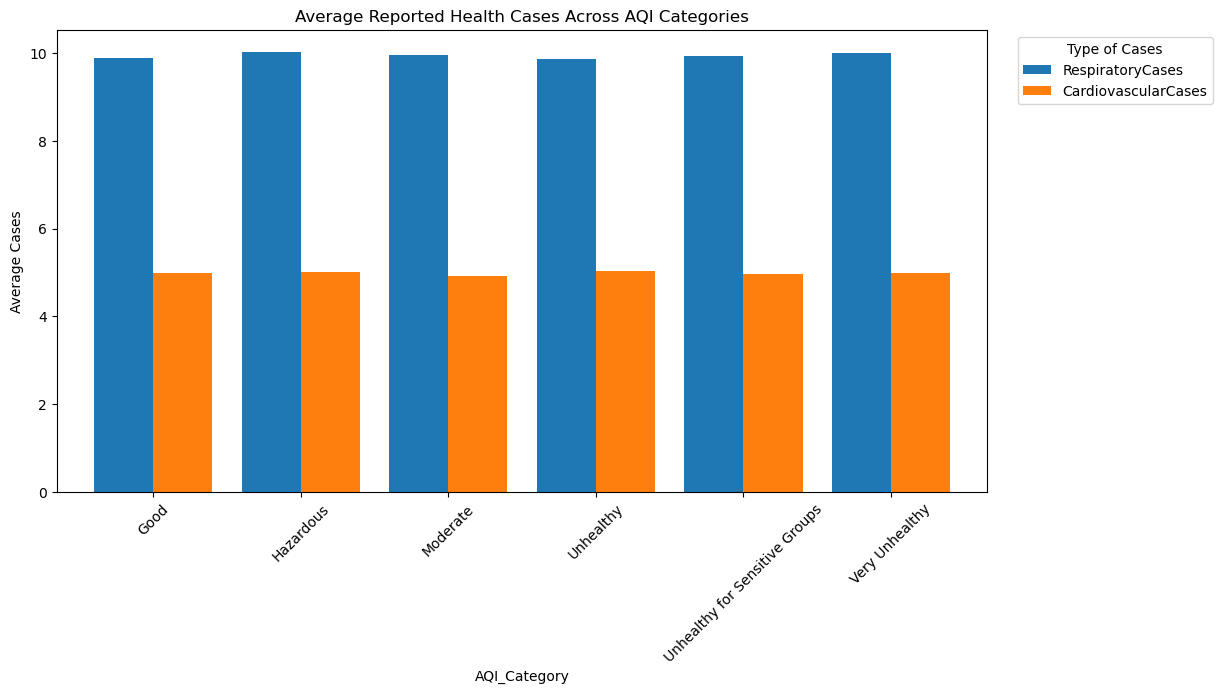

In [21]:
# Grouping, then calculate average occurance.
morbid_summary = df.groupby("AQI_Category")[["RespiratoryCases", "CardiovascularCases"]].mean().reset_index()

# plot using combined barplot
morbid_summary.plot(x="AQI_Category", kind="bar",figsize=(12,6),width=.8)
plt.title("Average Reported Health Cases Across AQI Categories")
plt.ylabel("Average Cases")
plt.xlabel("AQI_Category")
plt.xticks(rotation=45)
plt.legend(title="Type of Cases",bbox_to_anchor = (1.25,1),loc = 'upper right')

plt.show()

- Respiratory cases remain consistently high across all AQI categories, whereas cardiovascular cases exhibit relatively stable trends. This suggests that respiratory health is more sensitive to elevated pollution levels.

- The persistent case levels across varying AQI categories highlight a sustained health burden from air pollution, underscoring the need for preventive interventions regardless of exposure intensity.

**4.Analyze Health Outcome Vs AQI Levels. Is there a correlation between these attributes?**

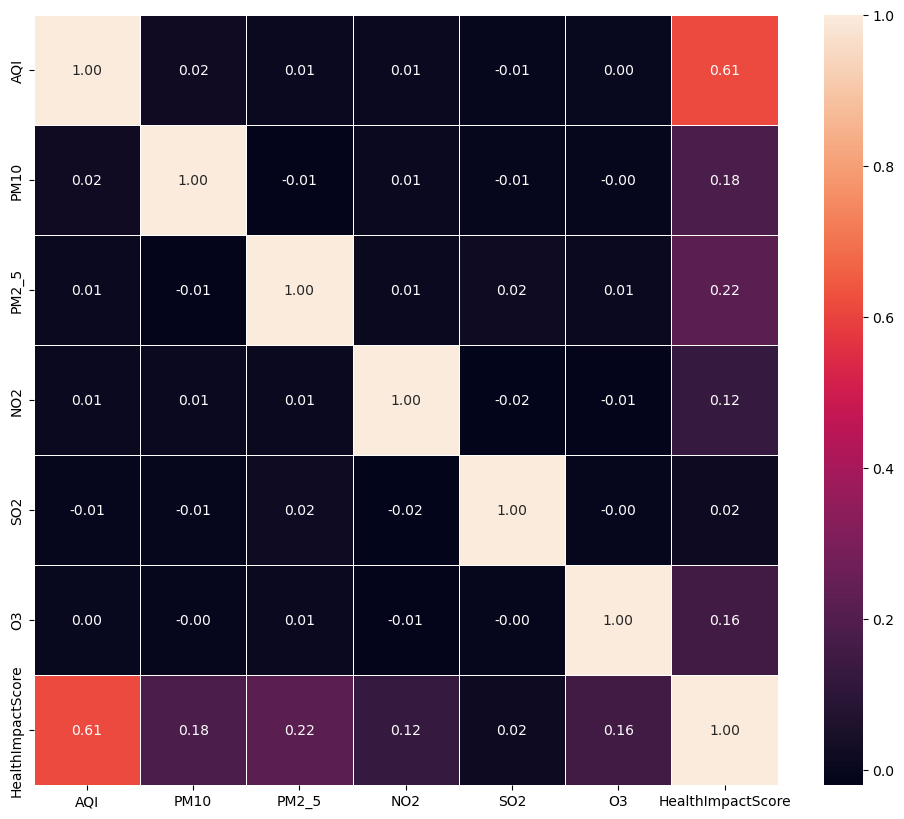

In [24]:
cor_columns = ["AQI","PM10","PM2_5","NO2","SO2","O3", "HealthImpactScore"]

# Correlation Matrix
corr = df[cor_columns].corr(method='pearson')

#plot
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt=".2f",linewidths=.5)
plt.show()

*Observation:*

- A strong positive correlation of **0.61** was observerd between AQI and the Health Impact Score, Indicating that as air quality index rises so does so does Health Impact Score. This Support the study's hypothesis that elevated pollution level are associated with potential health risk.

- Among the pollutants, `PM10`,`PM2_5`and `O3` show strongest correlation with Health Impact Score, suggesting possile being major contributors pollutant to adverse health effect.

**5.Evaluating Health Impact Score and Contributing pollutants**

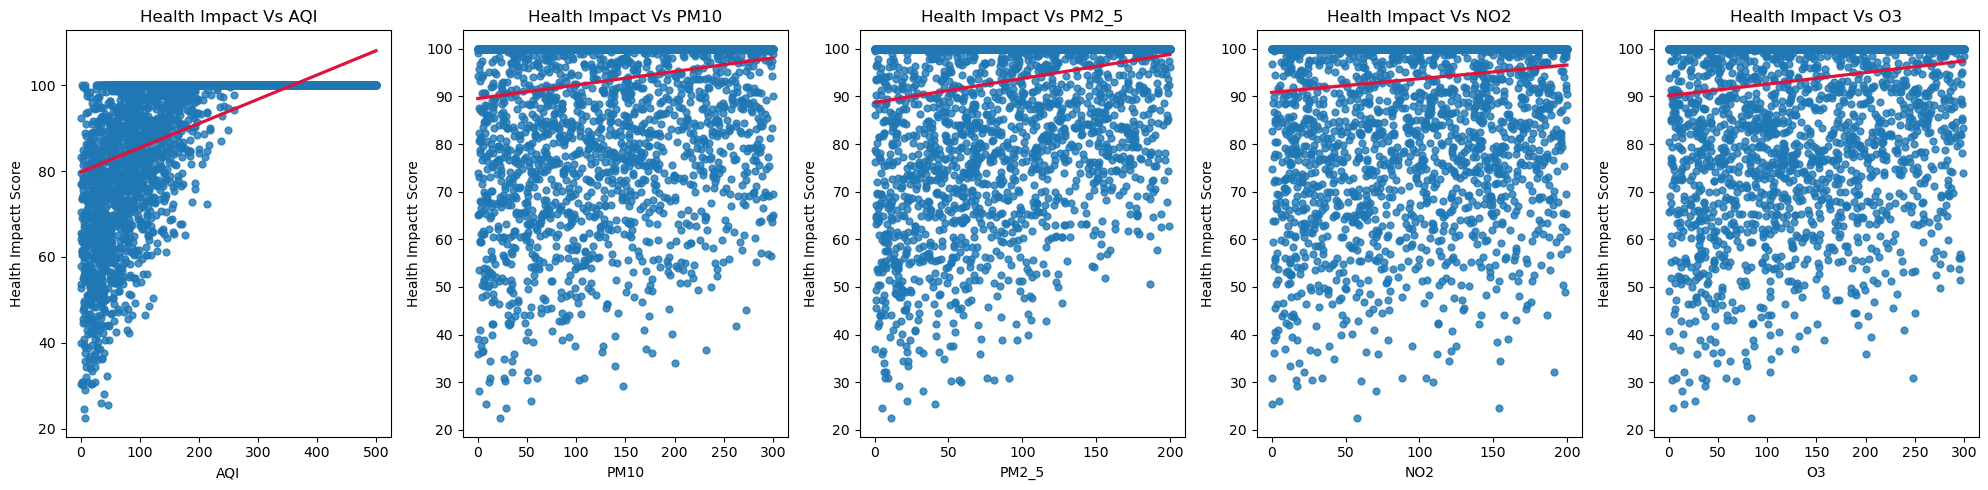

In [27]:
pollutants = ["AQI","PM10","PM2_5","NO2","O3"]

# using scatter plot to visualize correlation
fig, axes = plt.subplots(1, ncols=len(pollutants),figsize=(20,5))
axes = axes.flatten()

# pollutants correllation to health impact score
for p, pollutant in enumerate(pollutants):
  sns.regplot(x=df[pollutant],y=df["HealthImpactScore"],
                ax=axes[p],
                scatter_kws = {"s":24,"alpha":.8},
                line_kws = {"color":"crimson"})
  axes[p].set_title(f"Health Impact Vs {pollutant}")
  axes[p].set_xlabel(pollutant)
  axes[p].set_ylabel("Health Impactt Score")

plt.tight_layout()
plt.show()

*Observation:*

- The plot represent relationship between various air pollutants and the Health Impact Score, A regression line is overlaid on each scatter plot to highligh trend.

- It confirms that pollutancentration increasea and higher AQI levels are assosciated with greater health impact, supporting the objective of this study.`"PM10","PM2_5","NO2","O3"` are key pollutants to this effect,justifying the need for targeted air quality management to mitigate public health risk

**6.Predict pollutant-driven health impact patterns**

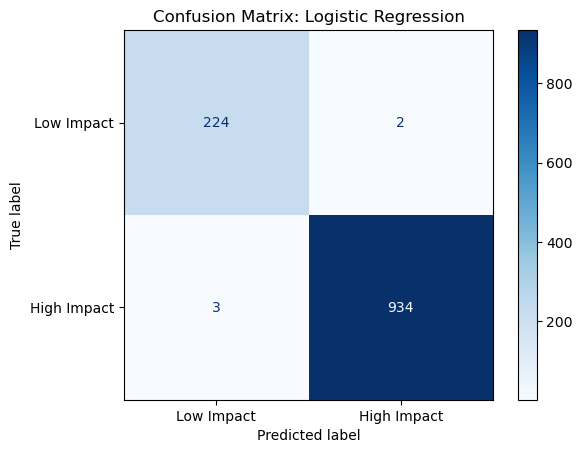

In [30]:
# set a binary target
df["HealthImpact"] = (df["HealthImpactScore"] >= 85).astype(int)

# features for prediction
features = ["AQI","PM10","PM2_5","NO2","SO2","O3"]
x = df[features]
y = df["HealthImpact"]

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# train logistic regression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# prediction and evaluation
y_pred = model.predict(x_test_scaled)
report = classification_report(y_test,y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test,y_pred)

# plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low Impact","High Impact"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [31]:
# classification report
print("Classification Metrics:")
pd.DataFrame(report).transpose().round(2)

Classification Metrics:


,precision,recall,f1-score,support
0,0.99,0.99,0.99,226.0
1,1.00,1.00,1.00,937.0
accuracy,1.00,1.00,1.00,1.0
macro avg,0.99,0.99,0.99,1163.0
weighted avg,1.00,1.00,1.00,1163.0


*Observation:*
- Most records were correctly identified especially High Impact ones. Only **5** were misclassified out of **1163** predictions. In classification metrics, very few false positive and all true high-impact cases detected, therefore a good balance between precision and recall.

- Overall, the result confirm that AQI and Pollutants are reliable predictors of health outcomes. Using logistic regression, the model achieved 99% accuracy in predicting high-risk heslth cases, providing strong support for the study's hypothesis